In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Assignment 3** : Clustering and Classification with Deep Learning on the “FashionMNIST" Dataset



#### Classification with Convolutional Neural Networks

Importing all the **libraries**


In [4]:
## libraries
from tensorflow import keras
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.python import keras
from keras import utils as np_utils

from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils.vis_utils import plot_model
#from keras.utils import plot_model
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
init_notebook_mode(connected=True)
import os

# ***Data preprocsessing and analysis***

In [5]:
IMG_ROWS = 28
IMG_COLS = 28
NUM_CLASSES = 5
TEST_SIZE = 0.2
RANDOM_STATE = 2018
#Model
NO_EPOCHS = 20
BATCH_SIZE = 128
PATH="/content/drive/MyDrive/UWaterloo/TERM1/ECE657a/ass3/ece657a-1221-asg3-fashionmnist-datafiles/Data/"
print(os.listdir(PATH))


['y_test.csv', 'y_train.csv', 'x_train.csv', 'x_test.csv']


In [6]:
#Loading the dataset
train_file = PATH+"x_train.csv"
test_file  = PATH+"x_test.csv"

y_train = PATH+"y_train.csv"
y_test = PATH+"y_test.csv"

train_x = pd.read_csv(train_file)
test_x = pd.read_csv(test_file)

train_y = pd.read_csv(y_train)
test_y = pd.read_csv(y_test)

train_y.columns = train_y.columns.str.replace('0', 'label')
test_y.columns = train_y.columns.str.replace('0','label')

In [7]:
print("Fashion MNIST train -  rows:",train_x.shape[0]," columns:", train_x.shape[1])
print("Fashion MNIST test -  rows:",test_x.shape[0]," columns:", test_x.shape[1])

Fashion MNIST train -  rows: 60000  columns: 784
Fashion MNIST test -  rows: 10000  columns: 784


In [8]:
print(train_x.shape)
print(train_y.shape)

(60000, 784)
(60000, 1)


In [9]:
train_data = pd.concat([train_y, train_x], axis=1, join = "outer")
#display(train_data)

In [10]:
test_data = pd.concat([test_y, test_x], axis=1, join = "outer")
#display(test_data)

To get the class distribution for training and testing dataset, we will run following script

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



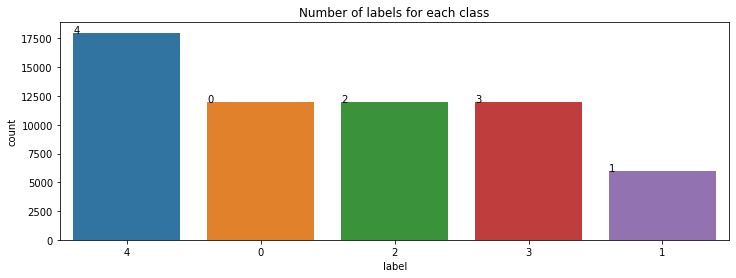

In [11]:
labels = {0: 0 , 1: 1, 2: 2, 3: 3, 4: 4 }
def plot_label_per_class(data):
    f, ax = plt.subplots(1,1, figsize=(12,4))
    g = sns.countplot(data.label, order = data["label"].value_counts().index)
    g.set_title("Number of labels for each class")

    for p, label in zip(g.patches, data["label"].value_counts().index):
        g.annotate(labels[label], (p.get_x(), p.get_height()+0.1))
    plt.show()  
    
plot_label_per_class(train_data)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



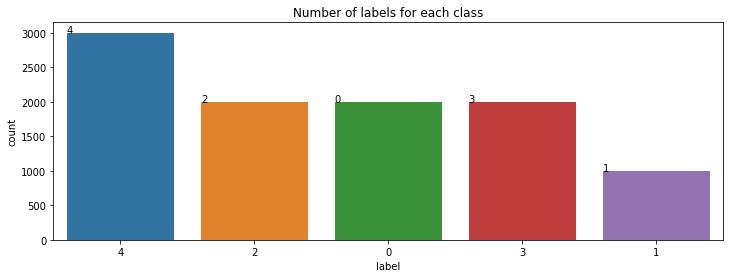

In [12]:
plot_label_per_class(test_y)

In [14]:
from tensorflow.keras.utils import to_categorical

**Now we will reshape the data and convert it to the input format:**

1) Convert the data into image shape (28,28,1) which will be our input format for the defined CNN model.

2) Also for label file we are taking on-hot encodings. 

In [1]:
 # data preprocessing
def data_preprocessing(raw):
    out_y = to_categorical(raw.label, NUM_CLASSES)
    num_images = raw.shape[0]
    x_as_array = raw.values[:,1:]
    x_shaped_array = x_as_array.reshape(num_images, IMG_ROWS, IMG_COLS, 1)
    out_x = x_shaped_array / 255
    return out_x, out_y

In [16]:
# prepare the data
X, y = data_preprocessing(train_data)
X_test, y_test = data_preprocessing(test_data)

In [17]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

**Splitting the training dataset into train and validation sets.**

In [18]:
print("Fashion MNIST train -  rows:",X_train.shape[0]," columns:", X_train.shape[1:4])
print("Fashion MNIST valid -  rows:",X_val.shape[0]," columns:", X_val.shape[1:4])
print("Fashion MNIST test -  rows:",X_test.shape[0]," columns:", X_test.shape[1:4])

Fashion MNIST train -  rows: 48000  columns: (28, 28, 1)
Fashion MNIST valid -  rows: 12000  columns: (28, 28, 1)
Fashion MNIST test -  rows: 10000  columns: (28, 28, 1)


# *Answer [CM1]*

### Classify the data using a Convolutional Neural Network
###(Default Network)

Below is the model definition as provided in the Assignment
Refer to model summary for more information

In [20]:
# Model
model = Sequential()
# Add convolution 2D
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=(IMG_ROWS, IMG_COLS, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, 
                 kernel_size=(3, 3), 
                 activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(NUM_CLASSES, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
flatten (Flatten)            (None, 3872)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               495744    
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 645       
Total params: 505,957
Trainable params: 505,957
Non-trainable params: 0
__________________________________________________

In [22]:
train_model_default = model.fit(X_train, y_train,
                  batch_size=BATCH_SIZE,
                  epochs=NO_EPOCHS,
                  verbose=1,
                  validation_data=(X_val, y_val))

Epoch 1/20
375/375 [==============================] - 14s 11ms/step - loss: 0.3562 - accuracy: 0.8693 - val_loss: 0.2520 - val_accuracy: 0.9115
Epoch 2/20
375/375 [==============================] - 4s 10ms/step - loss: 0.2213 - accuracy: 0.9195 - val_loss: 0.2200 - val_accuracy: 0.9223
Epoch 3/20
375/375 [==============================] - 4s 10ms/step - loss: 0.1806 - accuracy: 0.9346 - val_loss: 0.1864 - val_accuracy: 0.9347
Epoch 4/20
375/375 [==============================] - 4s 10ms/step - loss: 0.1541 - accuracy: 0.9431 - val_loss: 0.1886 - val_accuracy: 0.9336
Epoch 5/20
375/375 [==============================] - 4s 9ms/step - loss: 0.1326 - accuracy: 0.9519 - val_loss: 0.1804 - val_accuracy: 0.9352
Epoch 6/20
375/375 [==============================] - 4s 11ms/step - loss: 0.1168 - accuracy: 0.9570 - val_loss: 0.1907 - val_accuracy: 0.9332
Epoch 7/20
375/375 [==============================] - 6s 16ms/step - loss: 0.1009 - accuracy: 0.9632 - val_loss: 0.2074 - val_accuracy: 0.9254

Maximum training accuracy is 99.52 % at epoch = 20

Maximum validation accuracy is 94.08%  % at epoch = 20 **bold text**

In [23]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.3479614853858948
Test accuracy: 0.9355000257492065


Our Test loss is .34  and our Test accuracy is 93.55 %

Here validation training accuracy is near to 100% while validation loss is slightly increasing after few epochs. We will discuss this trend in [CM3] 

As we can see in the above graph that after 10 epochs, there is increase in loss for validation set, so there is a chance of model getting overfitted.

# Answer [CM2]
### (Our Own Network)

### We have added few dropout layers and a convolution layers with increasing number of filters. This is to overcome the overfitting happening the previous model after 10 epochs.

In [25]:
# Model
model = Sequential()
# Add convolution 2D
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=(IMG_ROWS, IMG_COLS, 1)))
model.add(MaxPooling2D((2, 2)))
# Add dropouts to the model
model.add(Dropout(0.25))
model.add(Conv2D(64, 
                 kernel_size=(3, 3), 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add dropouts to the model
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
# Add dropouts to the model
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
# Add dropouts to the model
model.add(Dropout(0.3))
model.add(Dense(NUM_CLASSES, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 3, 128)        

In [27]:
print(len(model.layers))

12


In [28]:
train_new_model = model.fit(X_train, y_train,
                  batch_size=64,
                  epochs=25,
                  verbose=1,
                  validation_data=(X_val, y_val))

Epoch 1/25
750/750 [==============================] - 15s 16ms/step - loss: 0.5326 - accuracy: 0.7816 - val_loss: 0.3362 - val_accuracy: 0.8720
Epoch 2/25
750/750 [==============================] - 11s 14ms/step - loss: 0.3404 - accuracy: 0.8721 - val_loss: 0.2601 - val_accuracy: 0.9028
Epoch 3/25
750/750 [==============================] - 10s 13ms/step - loss: 0.2889 - accuracy: 0.8941 - val_loss: 0.2247 - val_accuracy: 0.9172
Epoch 4/25
750/750 [==============================] - 12s 16ms/step - loss: 0.2633 - accuracy: 0.9026 - val_loss: 0.2093 - val_accuracy: 0.9222
Epoch 5/25
750/750 [==============================] - 12s 15ms/step - loss: 0.2491 - accuracy: 0.9078 - val_loss: 0.1994 - val_accuracy: 0.9283
Epoch 6/25
750/750 [==============================] - 10s 13ms/step - loss: 0.2349 - accuracy: 0.9134 - val_loss: 0.1866 - val_accuracy: 0.9323
Epoch 7/25
750/750 [==============================] - 11s 14ms/step - loss: 0.2259 - accuracy: 0.9178 - val_loss: 0.1874 - val_accuracy:

* Maximum training accuracy is 94.13 % at epoch = 25
* Maximum validation accuracy is 94.29%  % at epoch = 25

Here we can see that hte model is performing better than the previous model in terms of training loss vs validation loss and dropout layes seems to be helping in stoping overfitting.

In [30]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.17063970863819122
Test accuracy: 0.9391000270843506
[0.17063970863819122, 0.9391000270843506]


Test accuracy of the new model is 93.91% at tes loss of .17 which is half of the previous models.


* So even after increasing conv layers and filters sizes plus number of epochs compare to previous model, the training accuracy vs validation accuracy is more stabel and we are getting less val loss and test loss.





More of this we will discuss in [CM3].

# Answer [CM3] 
## [CM1] and [CM2] results Analysis


## *1) Default Model*

*Plotting graphs of training & Validation loss vs. epoch and training & validation accuracy vs. epoch*

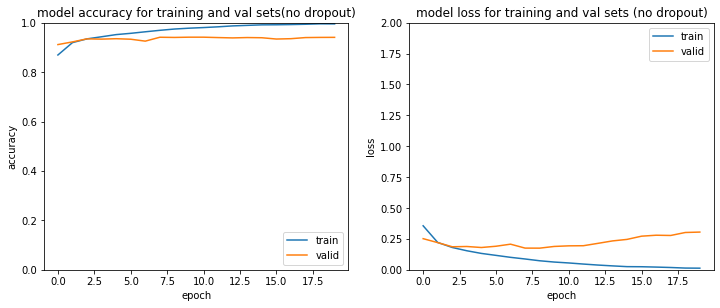

In [32]:
hist_d = train_model_default.history
acc_d= hist_d['accuracy']
val_acc_d = hist_d['val_accuracy']
loss_d= hist_d['loss']
val_loss_d= hist_d['val_loss']
epochs = list(range(1,len(acc_d)+1))

plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
plt.plot(acc_d)
plt.plot(val_acc_d)
plt.ylim(0, 1)
plt.title('model accuracy for training and val sets(no dropout)')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.subplot(2,2,2)
plt.plot(loss_d)
plt.plot(val_loss_d)
plt.title('model loss for training and val sets (no dropout)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.ylim([0,2])
plt.show()

From above graphs, we can say that
* Model is leading towards overfitting after 5 epochs(as training loss is decreasing while validation loss is slightly increasing afterwards)
* This can affect the testing accuracy and it will not perform well if we will try to train it will more number of epochs.

## *2) New model*

*Plotting graphs of training & Validation loss vs. epoch and training & validation accuracy vs. epoch of Our Own Network*

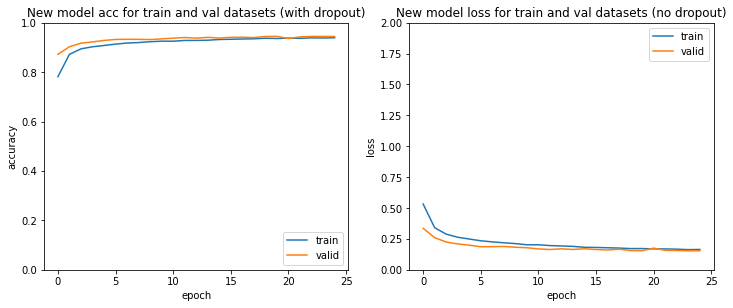

In [33]:
hist = train_new_model.history
acc = hist['accuracy']
val_acc = hist['val_accuracy']
loss = hist['loss']
val_loss = hist['val_loss']
epochs = list(range(1,len(acc)+1))
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
plt.plot(acc)
plt.plot(val_acc)
plt.ylim(0, 1)
plt.title('New model acc for train and val datasets (with dropout)')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.subplot(2,2,2)
plt.plot(loss)
plt.plot(val_loss)
plt.title('New model loss for train and val datasets (no dropout)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.ylim([0,2])
plt.show()



From above graphs, we can say that,
* The model is not gettting overfit even after running it to 25 epochs and the trends for train loss and valid loss are better than the previous model.
* Plus training accuracy is setting to one point and it is not fluctuating much after a certain epoch. By this we can interprete that if we will have more data or better labelled data, the model can perform better for more number of epochs.

In [37]:
y_pred = model.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(test_data.label, y_pred_bool))

157/157 [==============================] - 1s 5ms/step
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      2000
           1       0.99      0.97      0.98      1000
           2       0.93      0.93      0.93      2000
           3       0.97      0.98      0.97      2000
           4       0.94      0.93      0.93      3000

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



From the classification report of the new model, we cna observe that class 1 and 3 is performing very well. So it could be well labelled than the other classes.

# Answer [CM4]
## PCA,t-SNe, DBSCAN, K-Means on encodings that we got after last fully connected layers of CNN.


* Here we are getting the encoding from the 11th layer of our new model(last fully connected layer), which will return the 128 size of array(encodings) per image. 

* We will run the model on test data and get the test dataset encodings and perform above analysis on this dataset.

* Test data has 10000 instances after the operation we will have 10000 encodings of 128 array size.



In [43]:
keras_function = keras.backend.function([model.input], [model.layers[10].output])
train_encodes = keras_function(X_train)
train_encodes_array = train_encodes[0]
df_train = pd.DataFrame(train_encodes_array)
print("Training data encodings :",df_train.shape)

Training data encodings : (48000, 128)


In [44]:
test_encodes = keras_function(X_test)
test_encode_array = test_encodes[0]
print("size of test data encodings :",len(test_encode_array))


size of test data encodings : 10000


In [45]:
df_test = pd.DataFrame(test_encode_array)
df_test_y = pd.DataFrame(y_test)
df_y = df_test_y.idxmax(axis=1) #converting one-hot encoded y-label to 1d array


In [46]:
from sklearn.decomposition import PCA
import matplotlib.colors as mcolors
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [47]:
def sample_images_data(data):
    # An empty list to collect some samples
    sample_images = []
    sample_labels = []

    # Iterate over the keys of the labels dictionary defined in the above cell
    for k in labels.keys():
        # Get four samples for each category
        samples = data[data["label"] == k].head(10)
        # Append the samples to the samples list
        for j, s in enumerate(samples.values):
            # First column contain labels, hence index should start from 1
            img = np.array(samples.iloc[j, 1:]).reshape(IMG_ROWS,IMG_COLS)
            sample_images.append(img)
            sample_labels.append(samples.iloc[j, 0])

    print("Total number of sample images to plot: ", len(sample_images))
    return sample_images, sample_labels

train_sample_images, train_sample_labels = sample_images_data(train_data)

Total number of sample images to plot:  50


                                     Figure 1 :  Labelled Images                


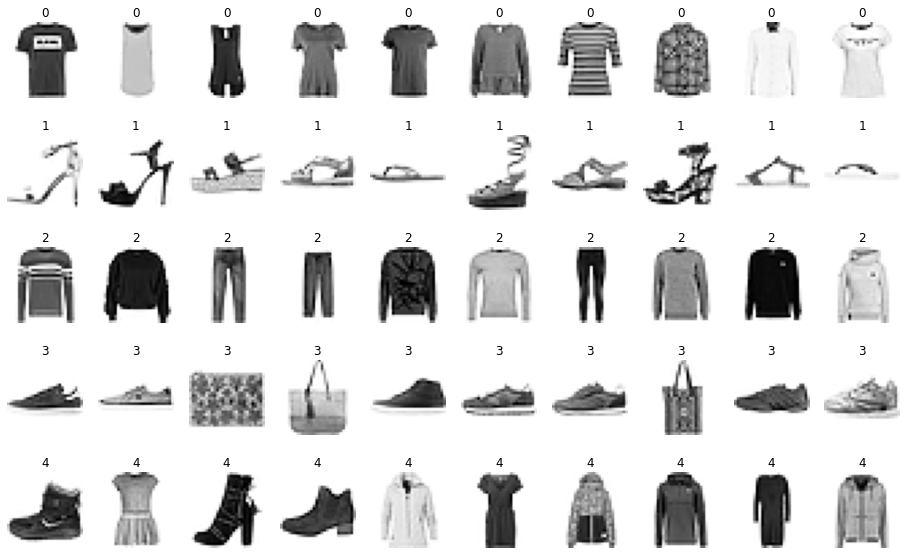

In [62]:
def plot_sample_images(data_sample_images,data_sample_labels,cmap="Blues"):
    # Plot the sample images now
    f, ax = plt.subplots(5,10, figsize=(16,10))

    for i, img in enumerate(data_sample_images):
        ax[i//10, i%10].imshow(img, cmap=cmap)
        ax[i//10, i%10].axis('off')
        ax[i//10, i%10].set_title(labels[data_sample_labels[i]])
    plt.show()    
print("                                     Figure 1 :  Labelled Images                ")  
plot_sample_images(train_sample_images,train_sample_labels, "Greys")

**Above is to show that how labelled are assigned to images and we will compare this output to the PCA and t-SNe graphs to get the better idea of the data labelling.**

###PCA

* We will perform PCA on test data and try to get two principal components out of 128 features and plot a graph of assigned labels


In [50]:
pca = PCA(n_components= 2)  # we will reduce the data set from 11 columns to 2 columns.
mnist_pca = pca.fit_transform(df_test) # fit means train, fit_transform means train and apply to a data set.
print(mnist_pca.shape)

(10000, 2)


Text(0.5, 1.0, 'Figure : 2  PCA of mnist test dataset')

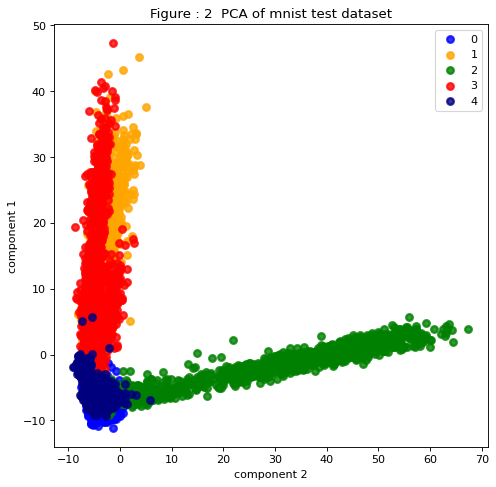

In [61]:
plt.figure(figsize=(7, 7), dpi=80)
colors = ["blue","orange","green","red","navy"]
lw = 2
target_names = [0,1,2,3,4]
for color, i, tn in zip(colors, [0,1,2,3,4], target_names):
    plt.scatter(
        mnist_pca[df_y == i, 0], mnist_pca[df_y == i, 1], color=color, alpha=0.8, lw=lw,label = tn
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("component 2")
plt.ylabel("component 1")
plt.title("Figure : 2  PCA of mnist test dataset")

From above plotting, we can infer following things,
* class 1 could be labelled more definitively and it is easy to train as is can be easily separable by other classes while we keep only two feature components.
* class 1 and 4 are highly overlaping in 2D space.
* class 1 and 3 are highly co-related as well and most of them are overlapping also.

Overall, applying PCA and getting two componet might not help us to give good accuracy as classes(labels) or datapoints are highly overlapping.

###t-SNE

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
mnist_tsne = tsne.fit_transform(df_test)

Text(0.5, 1.0, 'Figure : 3  t-SNE 2D of Wine dataset')

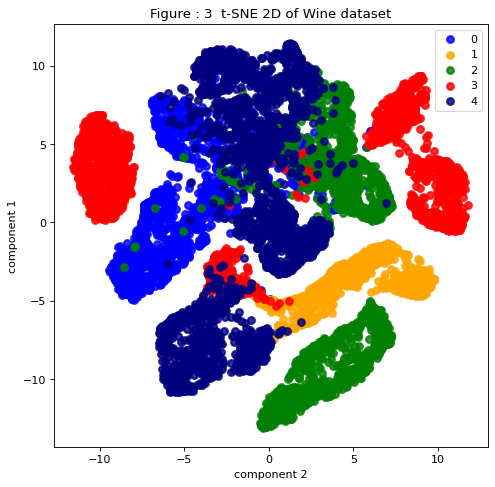

In [60]:
plt.figure(figsize=(7, 7), dpi=80)
colors = ["blue","orange","green","red","navy"]
lw = 2
target_names = [0,1,2,3,4]
for color, i, tn in zip(colors, [0,1,2,3,4], target_names):
    plt.scatter(
        mnist_tsne[ df_y== i, 0], mnist_tsne[df_y == i, 1], color=color, alpha=0.8, lw=lw,label = tn
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("component 2")
plt.ylabel("component 1")
plt.title("Figure : 3  t-SNE 2D of Wine dataset")

# DBSCAN

We will apply DBSCAN clustering algorithm on our training dataset and then try to predict the clsters on testing data.

In [75]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps = 6, min_samples = 80).fit(df_test)
cluster = clustering.labels_

I have run different combination of min_sample and eps values on test dataset to find the optimum values so that it will return 5 clusters as we know our data has 5 classes.

In [80]:
len(set(cluster))

5

In [81]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [84]:
def dbscan(X_train,X_test,pca_x , eps, min_samples):
    ss = StandardScaler()
    X = ss.fit_transform(X_train)
    db = DBSCAN(eps=eps, min_samples=min_samples)
    db.fit(X)
    y_pred = db.fit_predict(X_test)
    plt.scatter(pca_x[:,0], pca_x[:,1],c=y_pred, cmap='Paired')
    plt.xlabel("component-1")
    plt.ylabel("component-2")
    plt.title("DBSCAN")

         Figure 4        


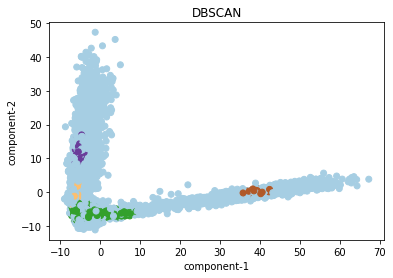

In [87]:
print("         Figure 4        ")
dbscan(df_train,df_test,mnist_pca,6,80)

Above graph shows that most of the datapoints are in one class only and others are overlapping that class which is not a good classification.

###  K-means clustering algorithm

This is another clustering algorithm to cluster the datset. Here we will take 5 cluster size and try to train our model on training set and than predict it on testing set.

In [91]:
def kmeans(X_train,X_test,pca_x, n_clusters):
    ss = StandardScaler()
    X = ss.fit_transform(X_train)
    km = KMeans(n_clusters=n_clusters)
    km.fit(X)
    y_pred = km.predict(X_test)
    plt.scatter(pca_x[:,0], pca_x[:,1],c=y_pred, cmap='Paired')
    plt.xlabel("component-1")
    plt.ylabel("component-2")
    plt.title("K-means")

           Figure 5             


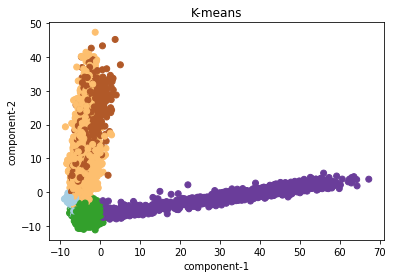

In [92]:
print("           Figure 5             ")
kmeans(df_train,df_test,mnist_pca,5)

From above graph, we can tell that k-means is performing better than DBSCAN at some extent as it is able to define purple and green clusetes very well while other datapoints are merging into each other.

## Final analysis

If we compare figure 3(t-SNE) with figure 1(lablled Images), we can observe following things:

* **Label 1(yellow)** is well seperated from other clusters and the same pattern you can see in **figure 1** (all female sandals) are assigned **label 1**
* Same way label 3(red) is producing two red clusters, which if we will refer to figure 1, we can say that those could be for sneakers and handbags( so these two categories have one label 3)
* label 2(green) is also generating two clusters one of them is close to label 0 and label 4, which expaines the mixied data (sweaters or male top) if you refer figure 1 for this labels.
* while label 0 has three clusters and most of the datapoints are overlaping with label 2 and 4. 

So after this analysis we cna say that,
* label 0 could be all the top ( female + male )
* label 1 can be female sandals
* label 2 some to (male sweaters + female  plus pants)
* label 3 are possibly sneakers and handbags.
* label 4 colud be boots plus clothes.

# **References**


[1] https://www.analyticsvidhya.com/blog/2021/06/understand-the-dbscan-clustering-algorithm/

[2] https://www.kaggle.com/code/gpreda/cnn-with-tensorflow-keras-for-fashion-mnist/notebook

[3] Why Dropounts prevent overfitting in Deep Neural Networks, https://medium.com/@vivek.yadav/why-dropouts-prevent-overfitting-in-deep-neural-networks-937e2543a701

[4] Dropout: A Simple Way to Prevent Neural Networks from Overfitting, https://www.cs.toronto.edu/~hinton/absps/JMLRdropout.pdf

[5] https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
